#### import packages and datasets

In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 7.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=1fde19d3262e6928c716b47d849fcfa20952dc07cec7eb2a810ab1bd01da3e04
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect
import pandas as pd
import re

In [ ]:
# nlp.sga@gmail.com
# password: NLPnlp123

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## DATA PREPROCESSING

In [ ]:
airlines = pd.read_csv('/content/drive/My Drive/airlines.csv', encoding= 'unicode_escape')
ebay = pd.read_csv('/content/drive/My Drive/ebay.csv')
hotels1 = pd.read_csv('/content/drive/My Drive/hotels1.csv', encoding= 'unicode_escape')
hotels2 = pd.read_csv('/content/drive/My Drive/hotels2.csv')
hotels3 = pd.read_csv('/content/drive/My Drive/hotels3.csv')
weather = pd.read_csv('/content/drive/My Drive/weather.csv')
movies = pd.read_csv('/content/drive/My Drive/movies.tsv', sep='\t')
restaurants = pd.read_csv('/content/drive/My Drive/restaurants.tsv', sep='\t')

In [ ]:
def clean_text(text):
  text = re.sub(r"@[A-Za-z0-9]+", ' ', text) # remove tags
  text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text) # remove hypelinks
  text = re.sub(r"[^A-Za-z0-9?! ]+", '', text) # remove non relevant characters
  text = text.lower() # convert all higher case letters to lower case
  return text

#### airlines

https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [ ]:
airlines = airlines[["text", "airline_sentiment"]]
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [ ]:
airlines.columns = ['review', 'sentiment']

In [ ]:
airlines.sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
airlines = airlines[airlines['sentiment'].isin(('positive', 'negative'))]
airlines.replace(['positive', 'negative'], [1, 0], inplace=True)

In [ ]:
airlines.sentiment.describe()

count    11541.000000
mean         0.204748
std          0.403535
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sentiment, dtype: float64

In [ ]:
airlines = airlines.drop(airlines[airlines['sentiment'] == 0].sample(frac=.75).index)

In [ ]:
airlines.sentiment.describe()

count    4657.000000
mean        0.507408
std         0.499999
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sentiment, dtype: float64

In [ ]:
airlines['review'] = airlines['review'].apply(clean_text)

#### ebay

https://www.kaggle.com/wojtekbonicki/ebay-reviews

In [ ]:
ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44756 entries, 0 to 44755
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        44756 non-null  object
 1   review title    44756 non-null  object
 2   review content  44756 non-null  object
 3   rating          44756 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
ebay = ebay[["review content", "rating"]]
ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44756 entries, 0 to 44755
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review content  44756 non-null  object
 1   rating          44756 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 699.4+ KB


In [ ]:
ebay.columns = ['review', 'sentiment']
ebay.sentiment.unique()

array([5, 3, 4, 2, 1])

In [ ]:
ebay = ebay[ebay['sentiment'].isin((1, 2, 4, 5))]
ebay.replace([1, 2, 4, 5], [0, 0, 1, 1], inplace=True)

In [ ]:
ebay.sentiment.describe()

count    43384.000000
mean         0.955237
std          0.206786
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64

In [ ]:
ebay = ebay.drop(ebay[ebay['sentiment'] == 1].sample(frac=.95).index)

In [ ]:
ebay.sentiment.describe()

count    4014.000000
mean        0.516193
std         0.499800
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sentiment, dtype: float64

In [ ]:
ebay['review'] = ebay['review'].apply(clean_text)

#### hotels1

https://data.world/datafiniti/hotel-reviews

In [ ]:
hotels1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35689 entries, 0 to 35688
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35689 non-null  object 
 1   categories            35689 non-null  object 
 2   city                  35689 non-null  object 
 3   country               35689 non-null  object 
 4   latitude              35607 non-null  float64
 5   longitude             35607 non-null  float64
 6   name                  35689 non-null  object 
 7   postalCode            35634 non-null  object 
 8   province              35689 non-null  object 
 9   reviews.date          35508 non-null  object 
 10  reviews.dateAdded     35689 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        34828 non-null  float64
 14  reviews.text          35687 non-null  object 
 15  reviews.title      

In [ ]:
hotels1 = hotels1[["reviews.text", "reviews.rating"]]
hotels1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35689 entries, 0 to 35688
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    35687 non-null  object 
 1   reviews.rating  34828 non-null  float64
dtypes: float64(1), object(1)
memory usage: 557.8+ KB


In [ ]:
hotels1.columns = ['review', 'sentiment']
hotels1.dropna(axis='rows', inplace=True)
hotels1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34826 entries, 0 to 35688
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   review     34826 non-null  object 
 1   sentiment  34826 non-null  float64
dtypes: float64(1), object(1)
memory usage: 816.2+ KB


In [ ]:
hotels1.sentiment.unique()

array([ 4. ,  2. ,  3. ,  5. ,  0. ,  1. , 10. ,  7.1,  4.5,  9.2,  9.6,
        4.2,  4.8,  6.7,  5.4,  3.3,  3.4,  4.7,  8.8,  8.3,  6.3,  1.3,
        6. ,  5.8,  4.1,  7.9,  9.5,  3.8,  4.3,  4.4,  2.5,  4.6,  2.9,
        2.8,  3.1,  7.5,  4.9,  3.9,  3.2,  2.4,  3.7,  1.5,  7. ])

In [ ]:
hotels1.sentiment.describe()

count    34826.000000
mean         3.787524
std          1.403420
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: sentiment, dtype: float64

In [ ]:
hotels1 = hotels1[hotels1['sentiment'].isin((0, 1, 4, 5))]
hotels1.sentiment.unique()

array([4., 5., 0., 1.])

In [ ]:
hotels1.replace([0, 1, 4, 5], [0, 0, 1, 1], inplace=True)

In [ ]:
hotels1['review'] = hotels1['review'].astype(str)

In [ ]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

In [ ]:
hotels1['lang'] = hotels1['review'].apply(det)
indices = hotels1[hotels1['lang'] != 'en'].index
hotels1.drop(indices, inplace = True)

In [ ]:
hotels1.sentiment.describe()

In [ ]:
hotels1 = hotels1.drop(hotels1[hotels1['sentiment'] == 1].sample(frac=.8).index)

In [ ]:
hotels1.sentiment.describe()

In [ ]:
hotels1 = hotels1.drop(columns=['lang'])

In [ ]:
hotels1['review'] = hotels1['review'].apply(clean_text)

#### hotels2

https://data.world/datafiniti/hotel-reviews

In [ ]:
hotels2.info()

In [ ]:
hotels2 = hotels2[["reviews.text", "reviews.rating"]]
hotels2.info()

In [ ]:
hotels2.columns = ['review', 'sentiment']
hotels2.dropna(axis='rows', inplace=True)
hotels2.info()

In [ ]:
hotels2.sentiment.unique()

In [ ]:
hotels2.sentiment.describe()

In [ ]:
hotels2 = hotels2[hotels2['sentiment'].isin((1, 2, 4, 5))]
hotels2.sentiment.unique()

In [ ]:
hotels2.replace([1, 2, 4, 5], [0, 0, 1, 1], inplace=True)
hotels2.sentiment.describe()

In [ ]:
hotels2 = hotels2.drop(hotels2[hotels2['sentiment'] == 1].sample(frac=.8).index)

In [ ]:
hotels2.sentiment.describe()

In [ ]:
hotels2['review'] = hotels2['review'].apply(clean_text)

#### hotels3

https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

In [ ]:
hotels3.info()

In [ ]:
hotels3.columns = ['review', 'sentiment']

In [ ]:
hotels3.sentiment.unique()

In [ ]:
hotels3 = hotels3[hotels3['sentiment'].isin((1, 2, 4, 5))]
hotels3.replace([1, 2, 4, 5], [0, 0, 1, 1], inplace=True)
hotels3.sentiment.unique()

In [ ]:
hotels3.sentiment.describe()

In [ ]:
hotels3 = hotels3.drop(hotels3[hotels3['sentiment'] == 1].sample(frac=.8).index)

In [ ]:
hotels3.sentiment.describe()

In [ ]:
hotels3['review'] = hotels3['review'].apply(clean_text)

#### hotels (merge hotels1, hotels2 and hotels3)

In [ ]:
hotels = pd.concat([hotels1, hotels2, hotels3])

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16060 entries, 7 to 20490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   review     16060 non-null  object 
 1   sentiment  16060 non-null  float64
dtypes: float64(1), object(1)
memory usage: 376.4+ KB


In [ ]:
hotels.head()

,review,sentiment
7,another reason to stay at this hampton att wif...,1.0
8,another reason to stay at this hampton att wif...,1.0
10,408 really big room very cool and clean perfec...,1.0
13,100 ransom for oversized vehicles small tv lou...,1.0
18,no chocolate bacon i am dissapoint great wait ...,0.0


In [ ]:
hotels = hotels.sample(frac=1).reset_index(drop=True)
hotels.head()

,review,sentiment
0,beautiful majextic colonial time caribbean met...,1.0
1,we stayed 11 days while my daughter was inpati...,1.0
2,i enjoyed our stay at best weatern plus oceanf...,1.0
3,paradise value money paradise value money trav...,1.0
4,save some cash and ask for the whataburger rate,1.0


#### weather

https://data.world/crowdflower/weather-sentiment

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   _unit_id                                                                        1000 non-null   int64  
 1   _canary                                                                         0 non-null      float64
 2   _unit_state                                                                     1000 non-null   object 
 3   _trusted_judgments                                                              1000 non-null   int64  
 4   _last_judgment_at                                                               1000 non-null   object 
 5   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 6   what_emotion_does

In [ ]:
weather = weather[["tweet_text", "what_emotion_does_the_author_express_specifically_about_the_weather"]]
weather.columns = ['review', 'sentiment']
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
weather.sentiment.unique()

array(['Positive', 'Negative',
       'Neutral / author is just sharing information',
       'Tweet not related to weather condition', "I can't tell"],
      dtype=object)

In [ ]:
weather = weather[weather['sentiment'].isin(('Positive', 'Negative'))]
weather.replace(['Positive', 'Negative'], [0, 1], inplace=True)

In [ ]:
weather.sentiment.describe()

count    502.000000
mean       0.539841
std        0.498907
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sentiment, dtype: float64

In [ ]:
weather['review'] = weather['review'].apply(clean_text)

#### movies

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [ ]:
movies = movies[["review", "sentiment"]]

In [ ]:
movies.sentiment.unique()

array([1, 0])

In [ ]:
movies.sentiment.describe()

count    25000.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: sentiment, dtype: float64

In [ ]:
movies['review'] = movies['review'].apply(clean_text)

#### restaurants

https://www.kaggle.com/vigneshwarsofficial/reviews

In [ ]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
restaurants.columns = ['review', 'sentiment']

In [ ]:
restaurants.sentiment.unique()

array([1, 0])

In [ ]:
restaurants.sentiment.describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: sentiment, dtype: float64

In [ ]:
restaurants['review'] = restaurants['review'].apply(clean_text)

#### Save datasets to google drive

In [ ]:
! cd drive/MyDrive/

In [ ]:
airlines.to_csv('/content/drive/My Drive/Clean Data/airlines.csv')
ebay.to_csv('/content/drive/My Drive/Clean Data/ebay.csv')
hotels1.to_csv('/content/drive/My Drive/Clean Data/hotels1.csv')
hotels2.to_csv('/content/drive/My Drive/Clean Data/hotels2.csv')
hotels3.to_csv('/content/drive/My Drive/Clean Data/hotels3.csv')
weather.to_csv('/content/drive/My Drive/Clean Data/weather.csv')
movies.to_csv('/content/drive/My Drive/Clean Data/movies.csv')
restaurants.to_csv('/content/drive/My Drive/Clean Data/restaurantes.csv')
hotels.to_csv('/content/drive/My Drive/Clean Data/hotels.csv')

#BERT

In [ ]:
# based on blogpost: https://skimai.com/fine-tuning-bert-for-sentiment-analysis/
!pip install transformers

     |████████████████████████████████| 2.6 MB 7.5 MB/s 
     |████████████████████████████████| 636 kB 68.5 MB/s 
     |████████████████████████████████| 3.3 MB 56.3 MB/s 
     |████████████████████████████████| 895 kB 67.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from transformers import BertTokenizer
import pandas as pd
import numpy as np
import torch

load clean data

In [ ]:
airlines = pd.read_csv('/content/drive/My Drive/Clean Data/airlines.csv')
ebay = pd.read_csv('/content/drive/My Drive/Clean Data/ebay.csv')
hotels = pd.read_csv('/content/drive/My Drive/Clean Data/hotels.csv')
weather = pd.read_csv('/content/drive/My Drive/Clean Data/weather.csv')
movies = pd.read_csv('/content/drive/My Drive/Clean Data/movies.csv')
restaurants = pd.read_csv('/content/drive/My Drive/Clean Data/restaurantes.csv')
hotels = hotels.fillna('')

In [ ]:
def get_bert_tokenizer():
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)
    return tokenizer

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda:0")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
# Create a function to tokenize a set of texts
def preprocessing_for_bert(data, tokenizer):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sentence in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            sentence,  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=512,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

def create_dataloader(inputs, masks, y, train=True, batch_size=8):
    labels = torch.tensor(np.array(y.apply(int)))
    # Create the DataLoader for our training set
    data = TensorDataset(inputs, masks, labels)
    if train:
        sampler = RandomSampler(data)
    else:
        sampler = SequentialSampler(data)
    dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
    return dataloader

In [ ]:
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassifier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False, loss_fn=nn.CrossEntropyLoss()):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader, loss_fn=nn.CrossEntropyLoss()):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

## CROSS DATASET EVALUATION

In [ ]:
datasets = {
    'airlines' : airlines,
    'ebay' : ebay,
    'hotels': hotels,
    'weather' : weather,
    'movies': movies,
    'restaurants' : restaurants
}

In [ ]:
def x_y_split(data):
    X = data['review']
    y = data['sentiment']
    return X, y

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import gc

f1_scores = np.zeros((len(datasets), len(datasets)))

for i, (train_key, train_value) in enumerate(datasets.items()):
    X_train, y_train = x_y_split(train_value)
    tokenizer = get_bert_tokenizer()
    train_inputs, train_masks = preprocessing_for_bert(X_train, tokenizer)
    train_dataloader = create_dataloader(train_inputs, train_masks, y_train, batch_size=8, train=True)
    
    loss_fn = nn.CrossEntropyLoss()

    torch.cuda.empty_cache()
    gc.collect()

    set_seed(42)
    bert_classifier, optimizer, scheduler = initialize_model(epochs=2)

    # train
    train(bert_classifier, train_dataloader, epochs=2, loss_fn=loss_fn)
    for j, (test_key, test_value) in enumerate(datasets.items()):
        if train_key == test_key:
          pass
        else:
            X_test, y_test = x_y_split(test_value)
            test_inputs, test_masks = preprocessing_for_bert(X_test, tokenizer)
            test_dataloader = create_dataloader(test_inputs, test_masks, y_test,  batch_size=8, train=False)

            # predict on test
            probs = bert_predict(bert_classifier, test_dataloader)

            # Get predictions from the probabilities
            threshold = 0.9
            preds = np.where(probs[:, 1] > threshold, 1, 0)

            print(f'train: {train_key}, test: {test_key}')
            print(classification_report(y_test, preds))
            score = f1_score(y_test, preds)
            f1_scores[i, j] = score

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel:

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.689992   |     -      |     -     |   15.69  
   1    |   40    |   0.591940   |     -      |     -     |   15.07  
   1    |   60    |   0.411845   |     -      |     -     |   15.28  
   1    |   80    |   0.550130   |     -      |     -     |   15.37  
   1    |   100   |   0.410992   |     -      |     -     |   15.52  
   1    |   120   |   0.375731   |     -      |     -     |   15.66  
   1    |   140   |   0.425858   |     -      |     -     |   15.83  
   1    |   160   |   0.472316   |     -      |     -     |   15.89  
   1    |   180   |   0.407244   |     -      |     -     |   15.91  
   1    |   200   |   0.357097   |     -      |     -     |   15.99  
   1    |   220   |   0.306868   |     -      |     -     |   16.11  
   1    |   240   |   0.283551   |     -      |     -     |   16.20  


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This 

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.663949   |     -      |     -     |   16.65  
   1    |   40    |   0.405464   |     -      |     -     |   16.01  
   1    |   60    |   0.326408   |     -      |     -     |   15.98  
   1    |   80    |   0.283758   |     -      |     -     |   15.85  
   1    |   100   |   0.176459   |     -      |     -     |   15.86  
   1    |   120   |   0.146234   |     -      |     -     |   15.84  
   1    |   124   |   0.573477   |     -      |     -     |   3.19   
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.099258   |     -      |     -     |   16.67  
   2    |   40    |   0.048002   |     -      |     -     |   15.8

In [ ]:
f1_scores_pd = pd.DataFrame(f1_scores, columns=datasets.keys(), index=datasets.keys())
f1_scores_pd

In [ ]:
f1_scores_pd.to_csv('/content/drive/My Drive/f1_scores.csv')

## Datasets Similarity

In [ ]:
! pip install --upgrade gensim

     |████████████████████████████████| 23.9 MB 85 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Text(0.5, 1.0, 'LDA of reviews dataset')

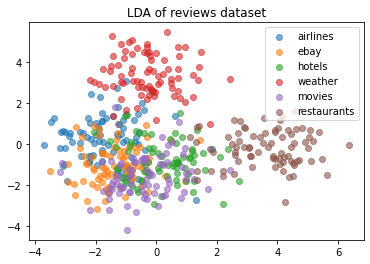

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

stop_words = set(stopwords.words('english'))

vectors_arr = None
y_arr = None
vectors = []
labels = []
all_words = []
for i, dataset in enumerate(datasets.keys()):
    words = ' '.join([j for j in datasets[dataset].review]).split()
    words = [w for w in words if not w.lower() in stop_words]
    # extract the words & their vectors, as numpy arrays
    for word in list(set(words)):
        try:
            vectors.append(wv[word])
            all_words.append(word)
            labels.append(i)
        except:
            pass

all_words_labels = pd.DataFrame(zip(all_words, labels), columns=['word', 'label'])
df = all_words_labels.groupby('word').count()
passed = df[df['label']<=3].reset_index()['word'].tolist()


all_words_labels = all_words_labels[all_words_labels['word'].isin(passed)]
all_words_labels['vector'] = all_words_labels['word'].apply(lambda x: wv[x])

all_words_labels = all_words_labels.groupby('label', group_keys=False).apply(lambda x: x.sample(80))


X = np.asarray(all_words_labels['vector'].tolist())
y = np.asarray(all_words_labels['label'].tolist())

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

lw = 2

fig = pyplot.figure()

for i, dataset in enumerate(datasets.keys()):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.6, label=dataset)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of reviews dataset')

Text(0.5, 1.0, 'LDA of reviews datasets')

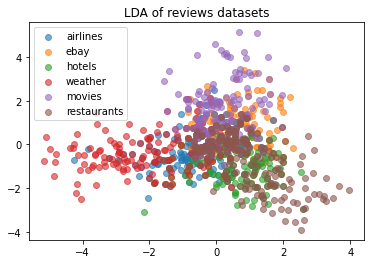

In [ ]:
import seaborn as sns

total_counts_pd = None
for i, dataset in enumerate(datasets.keys()):
    words = ' '.join([j for j in datasets[dataset].review]).split()
    words = [w for w in words if not w.lower() in stop_words]
    counts = dict()
    for x in words:
        try:
            vector = wv[x]
            counts[x] = counts.get(x, 0) + 1
        except:
            pass
    counts_pd = pd.DataFrame(counts.items(), columns =['word', 'count'])
    counts_pd = counts_pd.sort_values(by='count', ascending=False).reset_index()
    counts_pd = counts_pd[:200]
    counts_pd['vector'] = counts_pd['word'].apply(lambda x: wv[x])
    counts_pd['label'] = len(counts_pd)*[i]
    counts_pd['label'] = counts_pd['label'].dropna()
    total_counts_pd = counts_pd if total_counts_pd is None else pd.concat([total_counts_pd, counts_pd])

X = np.asarray(total_counts_pd['vector'].tolist())
y = np.asarray(total_counts_pd['label'].tolist())

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

for i, dataset in enumerate(datasets.keys()):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.6, label=dataset)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of reviews datasets')

#### Few shot learning

In [ ]:
def train_test_split(data, train_size):
    train_size = int(len(data)*train_size)
    X_train = data[:train_size]['review']
    X_test = data[train_size:]['review']
    y_train = data[:train_size]['sentiment']
    y_test = data[train_size:]['sentiment']
    return X_train, X_test, y_train, y_test

In [ ]:
# datasets combos with low F1 scores
import gc 
from sklearn.metrics import confusion_matrix, f1_score, classification_report

bad_combos = [(0,3), (1,3), (2,3), (4,3), (5,3)]

for i, (train_key, train_value) in enumerate(datasets.items()):
    for j, (test_key, test_value) in enumerate(datasets.items()):
        if (i,j) in bad_combos:
            print(f'train: {train_key}, test: {test_key}')
            X_train, y_train = x_y_split(train_value)
            print(len(X_train))
            X_train_addition, X_test, y_train_addition, y_test = train_test_split(test_value, train_size=0.2)
            X_train = pd.concat([X_train, X_train_addition])
            y_train = pd.concat([y_train, y_train_addition])
            print(len(X_train))
            tokenizer = get_bert_tokenizer()
            train_inputs, train_masks = preprocessing_for_bert(X_train, tokenizer)
            test_inputs, test_masks = preprocessing_for_bert(X_test, tokenizer)
            train_dataloader = create_dataloader(train_inputs, train_masks, y_train, batch_size=8, train=True)
            test_dataloader = create_dataloader(test_inputs, test_masks, y_test,  batch_size=8, train=False)

            loss_fn = nn.CrossEntropyLoss()

            torch.cuda.empty_cache()
            gc.collect()

            set_seed(42)
            bert_classifier, optimizer, scheduler = initialize_model(epochs=2)

            # train
            train(bert_classifier, train_dataloader, epochs=2, loss_fn=loss_fn)

            # predict on test
            probs = bert_predict(bert_classifier, test_dataloader)

            # Get predictions from the probabilities
            threshold = 0.9
            preds = np.where(probs[:, 1] > threshold, 1, 0)

            print(f'train: {train_key}, test: {test_key}')
            print(classification_report(y_test, preds))
            score = f1_score(y_test, preds)

train: airlines, test: weather
4657
4757


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.620375   |     -      |     -     |   15.07  
   1    |   40    |   0.416628   |     -      |     -     |   14.34  
   1    |   60    |   0.331770   |     -      |     -     |   14.51  
   1    |   80    |   0.356682   |     -      |     -     |   14.67  
   1    |   100   |   0.341697   |     -      |     -     |   14.90  
   1    |   120   |   0.403625   |     -      |     -     |   15.00  
   1    |   140   |   0.321691   |     -      |     -     |   15.09  
   1    |   160   |   0.338809   |     -      |     -     |   15.18  
   1    |   180   |   0.344681   |     -      |     -     |   15.33  
   1    |   200   |   0.255509   |     -      |     -     |   15.41  
   1    |   220   |   0.249869   |     -      |     -     |   15.51  
   1    |   240   |   0.418972   |     -      |     -     |   15.69  


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This 

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.643702   |     -      |     -     |   16.73  
   1    |   40    |   0.390492   |     -      |     -     |   16.34  
   1    |   60    |   0.443905   |     -      |     -     |   16.08  
   1    |   80    |   0.432165   |     -      |     -     |   15.87  
   1    |   100   |   0.410606   |     -      |     -     |   15.82  
   1    |   120   |   0.456409   |     -      |     -     |   15.86  
   1    |   140   |   0.433756   |     -      |     -     |   16.01  
   1    |   160   |   0.346490   |     -      |     -     |   15.99  
   1    |   180   |   0.390238   |     -      |     -     |   15.98  
   1    |   200   |   0.240576   |     -      |     -     |   15.97  
   1    |   220   |   0.563648   |     -      |     -     |   15.90  
   1    |   240   |   0.306614   |     -      |     -     |   15.90  


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This 

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.594946   |     -      |     -     |   16.81  
   1    |   40    |   0.503613   |     -      |     -     |   16.68  
   1    |   60    |   0.279346   |     -      |     -     |   16.44  
   1    |   80    |   0.312665   |     -      |     -     |   16.05  
   1    |   100   |   0.330441   |     -      |     -     |   15.85  
   1    |   120   |   0.280686   |     -      |     -     |   15.95  
   1    |   140   |   0.250018   |     -      |     -     |   16.10  
   1    |   160   |   0.331037   |     -      |     -     |   16.17  
   1    |   180   |   0.393384   |     -      |     -     |   16.10  
   1    |   200   |   0.238546   |     -      |     -     |   16.06  
   1    |   220   |   0.264365   |     -      |     -     |   16.08  
   1    |   240   |   0.360747   |     -      |     -     |   16.08  
